## Import des librairies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

## SGD Classifier

In [7]:
data = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

Pipeline, fit

In [9]:
max_iter = int(np.ceil(10**6/ X_train.shape[0]))

classif = make_pipeline(StandardScaler(),
                        linear_model.SGDClassifier(max_iter=max_iter, tol=1e-3))

classif.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=8929))])

Predict, score

In [10]:
y_pred = classif.predict(X_test)

accu = metrics.accuracy_score(y_test, y_pred)
accu

0.9210526315789473

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  3],
       [ 0,  0, 12]])

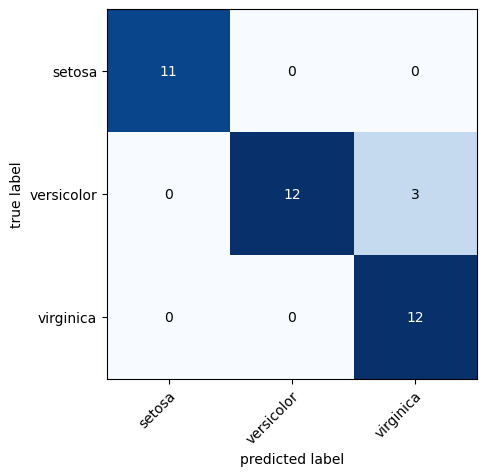

In [12]:
class_names = ['setosa','versicolor','virginica']

fig, axis = plot_confusion_matrix(conf_mat=cm, class_names=class_names)
plt.title=("Matrice de confusion")

Ici, on charge l'ensemble de données Iris, on le divise en ensembles d'entraînement et de test, puis on construit un pipeline de classification utilisant le Stochastic Gradient Descent (SGD). Le modèle est formé sur les données d'entraînement, des prédictions sont faites sur les données de test, et les performances du modèle sont évaluées en termes de précision et de matrice de confusion, qu'on affiche ensuite

## SGD Regressor

In [14]:
data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

Pipeline, fit

In [15]:
max_iter = int(np.ceil(10**6 / X_train.shape[0]))

reg = make_pipeline(StandardScaler(),
                    linear_model.SGDRegressor(max_iter=max_iter))

reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=2348))])

Predict, score

In [16]:
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

print("MAE : ",mae.round(2))
print("MSE : ",mse.round(2))
print("RMSE : ", rmse.round(2))

MAE :  0.19
MSE :  0.06
RMSE :  0.25


Cette section suit une logique similaire à la première sur la classification, mais cette fois-ci pour un problème de régression. L'ensemble de données du cancer du sein est chargé, divisé en ensembles d'entraînement et de test, et un pipeline de régression SGD est créé. Le modèle est entraîné, des prédictions sont faites sur les données de test, et les performances sont évaluées en termes d'erreur absolue moyenne (MAE), d'erreur quadratique moyenne (MSE), et de racine carrée de l'erreur quadratique moyenne (RMSE).

## Average SGDRegressor

In [17]:
reg = make_pipeline(StandardScaler(),
                    linear_model.SGDRegressor(max_iter=max_iter, average=True))

reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(average=True, max_iter=2348))])

In [18]:
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

print("MAE : ",mae.round(2))
print("MSE : ",mse.round(2))
print("RMSE : ", rmse.round(2))

MAE :  0.2
MSE :  0.06
RMSE :  0.25


Cette section est similaire à la précédente, mais utilise le paramètre "average=True" pour activer le moyennage dans le modèle SGDRegressor. Cela peut être utilisé pour améliorer la stabilité de l'entraînement dans certains cas. Ici, il est peu significatif